# 5장. 선형 회귀 모델: 먼저 긋고 수정하기

(식1)  
$$ e = \sum_{i=0}^{N-1} {e_i}^2 = \sum_{i=0}^{N-1}(y_i - \hat{y_i})^2$$  
(식2)  
$$평균제곱오차(MSE) = \frac{1}{N} \sum (y_i - \hat{y_i})^2$$  

 4장을 학습하면서 기울기 $a$를 적절하게 잡지 못하면 오차($e$)가 커지는 것을 확인했습니다. 기울기를 크게 잡거나 너무 작게 잡아도 오차($e$)가 커집니다. 기울기 $a$와 오차($e$) 사이에는 이렇게 상관관계가 있습니다. 이때 기울기가 무한대로 커지거나($+\infty$)  또는 무한대로 작아지면($-\infty$) y축과 나란한 직선이 됩니다.그러면 오차($e$)도 무한대로 커지겠됩니다. 기울기 $a$와 오차($e$ 또는 MSE)의 관계를 다시 말하면 기울기 $a$와 오차 사이에는 아래 그림과 같이 **2차 함수의 관계**가 있다는 뜻입니다.  
<br><center>
(그림. 5-1) 기울기 $a$와 오차와의 관계:적절한 기울기를 찾을 때 오차가 최소화된다<br>
<img src="https://drive.google.com/uc?id=11TN59OhxqSl2QOGKeMfDt88KXY_epR-t" width=400>
</center><br>

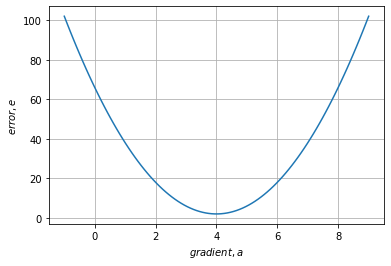

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = np.linspace(-1, 9, 100)
w = 4
m = 4
e0 = 2
e = w*(a-m)**2 + e0
plt.plot(a, e)
plt.xlabel('$gradient, a$')
plt.ylabel('$error,e$')
plt.grid()

 위 그래프에서 가로 축은 기울기 $a$이며 세로 축은 오차 $e$를 나타내고 있습니다. 변수 $a$에 따른 오차 $e$를 그린 그래프이다. 이 그래프에서 **오차가 가장 작을 때는 언제인가?** 그래프의 가장 아래쪽으로 볼록한 부분에 이르렀을 때입니다. 가속도 $a$가 4일 때입니다. 위 그래프는 다음 식(3)과 같이 표현할 수 있습니다.  
(식3)  
$$e=w(a-m)^2+e_0$$  

  
위 그래프는 $m=4$, $e_0=2$ 그리고 $w=4$ 일 때를 그린 것입니다. 이 그래프에서 오차($e$)가 최소가 되는 지점은 기울기($a$)의 값이 $m$이 될 때입니다. $a=m$일 때 오차($e$)는 최소 오차값인 $e_0$이 됩니다. 


 좀 익숙한 기호를 이용하여 위 식을 눈에 익숙한 형태로 바꾸면 위 식(3)은 아래 식(4)와 같습니다. 가로 축은 $x$이며 세로 축을 $y$라고 가정합니다.$a$는 가속도가 아닌 임의의 상수입니다.  
(식4)  
$$y=a(x-x_0)^2+y_0 =a(x-4)^2+y_0$$
$$y=4(x-4)^2+2=4(x^2-8x +16) +2=4x^2-32x+68$$




 우리는 4장에서 임의의 기울기($a_1$)를 선택하여 예측 선($\hat{y} =a_1x+b$)을 만들고 예측한 값과 실제값 사이의 평균 제곱 오차(MSE)를 구해봤습니다. 이 때 임의로 정한 기울기 값을 적절히 변경해가면서 오차값이 최소 오차($e_0$)가 되는 최적의 기울기($m$)를 찾게 되는 것입니다. 기울기($a$)값이 변경됨에 따라 오차($e$)가 최소 오차($e_0$)에 가까워지고 따라서 기울기가($a$)가 최적 기울기 값 $m$에 가까워진다는 것을 컴퓨터가 판단해야할 것 입니다. 이러한 판단을 하게 하는 방법이 바로 **경사하강법(gradient decent)**입니다.


## 1.경사하강법(Gradient decent)
참고
 - gradient : (특히 도로, 철도의) 경사도, 기울기. 예)  steep gradient(급경사도)
 - descent : 내려오기, 하강, 내리막($\leftrightarrow$ascent)

% gradient descent = 내리막 경사?

식(5)  
$$y=4(x-4)^2+2 $$  
식(5)에서 변수$x$를 변수 $a$로 변경하여 표현하면 식(6)과 같이 표현할 수 있습니다.   
식(6)
$$e=w(a-m)^2+e_0 →e=4(a-4)^2+2$$  

위 식(6)의 그래프를 다시 살펴보겠습니다.


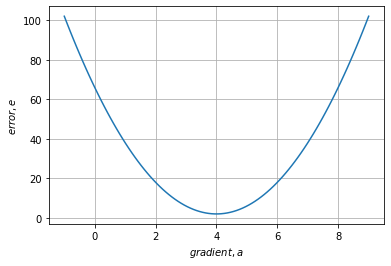

In [ ]:
a = np.linspace(-1, 9, 100)
w = 4
m = 4
e0 = 2
e = w*(a-m)**2 + e0
plt.plot(a, e)
plt.xlabel('$gradient, a$')
plt.ylabel('$error,e$')
plt.grid()

<br><center>
<img src="https://drive.google.com/uc?id=1fBNK0gJhR5WOzx84XY1kOgYJQPjgaxEV" width=400>
</center><br>

 예측선의 기울기($a$)가 $a < m$인 구간에서 오차 식($e$)의 기울기는 (-)음수이며 예측선의 기울기($a$)가 $a > m$인 구간에서는 오차 식($e$)의 기울기는 (+)양수이다. 최소 오차값($e_0$)얻기 위해서는 오차식($e$)에서 $a=m$이 될 때이며 이 때의 **오차 식($e$)의 기울기는 0입니다.**  따라서 우리가 해야할 일은 오차 식의 기울기가 0인 지점을 찾는 것이다. 다른 말로 오차 식($e$)의 기울기가 0일 때의 예측 선의 기울기($a$)를 찾는 것입니다. 이를 위해 다음 과정을 진행합니다. 

<center>
<img src="https://drive.google.com/uc?id=1Gtg9aEpWy_dMEqrWOF4wDtVFSj5eFMpa" width=400>
</center>

1. 임의의 위치($a_1$)에서 오차식($e$)의 기울기를 구한다.
2. 구한 기울기가 양수라면 $a_1$ 보다 더 작은 $a$ 값을 선택하고
   구한 기울기 값이 음수라면 $a_1$보다 더 큰 $a$값은 선택하여 기울기를 값을 구한다. 구한 기울기 값이 0에 매우가까울 때까지 2번 과정을 반복한다.

**경사하강법은 이렇게 반복적으로 기울기 $a$를 바꿔가면서 $m$ 값을 찾아가는 방법이다.**


***

 위 1~2 과정을 반복하면서 다음 기울기 조사 지점으로 이동할 때의 값 변화폭을 잘 선택해야함. 지나치게 크게 $a$값을 바꾸하면 기울기가 0인 지점을 못 찾을 수 있다. a값의 변화 폭을 어떻게 정하느냐가 **'학습율'**입니다. 정리해서 말하면 **경사하강법은 기울기($a$)의 변화에 따른 오차의 변화를 2차 식($e$)를 만들고 적절한 학습율을 설정해 오차 식의 기울기가 0인 지점을 찾는 것입니다.**  
  

 참고 - $y$절편 $b$의 값도 이와 같은 성질을 가지고 있습니다. $b$ 값이 너무 크면 오차도 함께 커지고 너무 작아도 오차가 커집니다. 그래서 최적의 $b$ 값을 구할 때 경사 하강법을 사용합니다. 


## 2. 파이썬 코딩으로 확인하는 선형 회귀
지금까지의 설명한 내용을 바탕으로 파이썬 코드를 작성해보려고 합니다. 먼저 평균 제곡 오차 식을 다시 살펴보겠습니다.

(식5)
$$평균제곱오차(MSE) = \frac{1}{N} \sum (y_i - \hat{y_i})^2$$

(식6)
$$\hat{y}=ax+b$$

식(5)에서 $\hat{y_i}$는 식(6)에서 $x=x_i$때의 $\hat{y}$의 값이다.따라서  $\hat{y_i}$은 식(7)과 같이 쓸 수 있다.

식(7)
$$\hat{y_i} = ax_i+b$$

식(5)에 식(7)을 대입하여 식(8)와 같이 쓸 수 있다.  
식(8)
$$평균제곱오차(MSE) = \frac{1}{N} \sum (y_i -(ax_i+b) )^2$$


먼저 식(5)을 식(9)와 같이 풀어쓸 수 있다.   
식(9)
$$\frac{1}{N} \sum (y_i - \hat{y_i})^2  =\frac{1}{N} \sum (y_i - \hat{y_i})(y_i - \hat{y_i}) =\frac{1}{N} \sum({y_i}^2 - 2y_i\hat{y_i} + \hat{y_i}^2) $$  

여기서 $({y_i}^2 - 2y_i\hat{y_i}+\hat{y_i}^2)$에 식(7)를 대입하여 정리해보면  

$${y_i}^2-2y_i(ax_i+b)+(ax_i+b)^2 = {y_i}^2 - 2y_i(ax_i+b)+(ax_i+b)^2= {y_i}^2 -2a{x_i} {y_i} - 2b{y_i} +(ax_i+b)(ax_i+b) ={y_i}^2 -2a{x_i} {y_i} - 2b{y_i} + a^2x_i^2 + 2abx_i+b^2$$

따라서 식(5)을 식(10)과 같이 표현할 수 있다.  
식(10)

$$평균제곱오차(MSE) = \frac{1}{N} \sum (y_i - \hat{y_i})^2 = \frac{1}{N} \sum ({y_i}^2 -2a{x_i} {y_i} - 2b{y_i} + a^2{x_i}^2 + 2abx_i+b^2)$$

식(10)을 $a$에대해 (편)미분하면 식(11)과 같다.  
식(11)
$$ \frac{2}{N} \sum -x_i(y_i-(ax_i+b))$$

식(10)을 $b$에 대해 (편)미분하면 식(12)과 같다.  
식(12)  
$$ \frac{2}{N} \sum -(y_i-(ax_i+b))$$





In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97]) 
N = len(x)
a = 3                     # 임의의 예측 선의 기울기
b = 70                    # 임의의 예측 선의 y절편
y_hat = a * x + b         # 임의의 예측 선 생성

In [ ]:
# 예측 선의 기울기 a가 3일 때 에러(e)의 기울기.
a_diff = (2/N) * sum(-x*(y - y_hat) )
b_diff = (2/N) * sum(-(y - y_hat))

In [ ]:
print( a_diff )
print( b_diff)

-48.0
-11.0


우리가 해야할 일은 오차 식의 기울기가 0인 지점을 찾는 것이다. 다른 말로 오차 식($e$)의 기울기가 0일 때의 예측 선의 기울기($a$)를 찾는 것입니다. 이를 위해 다음 과정을 진행합니다. 

1. 임의의 위치($a_1$)에서 오차식($e$)의 기울기를 구한다.
2. 구한 기울기가 양수라면 $a_1$ 보다 더 작은 $a$ 값을 선택하고
   구한 기울기 값이 음수라면 $a_1$보다 더 큰 $a$값은 선택하여 기울기를 값을 구한다. 구한 기울기 값이 0에 매우가까울 때까지 2번 과정을 반복한다.

In [ ]:
lr = 0.03

In [ ]:
# 이 코드 cell를 반복해서 실행시키면서 a_diff와 b_diff의 값 변화를 관찰하시요

a = a - lr * a_diff       # a_diff가 음수라면 다음 a 값은 이전 a 값 보다 커짐.
                          # a_diff가 양수라면 다음 a 값은 이전 a 값 보다 작아짐.
b = b - lr * b_diff
y_hat = a * x + b         # 임의의 예측 선 생성

a_diff = (2/N) * sum(-x*(y - y_hat) )
b_diff = (2/N) * sum(-(y - y_hat))

print(a_diff)
print(b_diff)

0.9777337203932035
-2.1068075532287764


### 과제
 - 과제 1 : 식(10)을 $a$에 대해 편미분하는 과정을 식으로 보이십시요.
 - 과제 2 : 식(10)을 $b$에 대해 편미분하는 과정을 식으로 보이십시요.

과제 1에 대하여  
$\frac{\partial}{\partial a} \frac{1}{N} \sum ({y_i}^2 -2a{x_i} {y_i} - 2b{y_i} + a^2{x_i}^2 + 2abx_i+b^2)$  
$= \frac{1}{N} \sum{( -2{x_i} {y_i} + 2a{x_i}^2 + 2bx_i)}$  
$= \frac{1}{N} \sum{-2x_i(y_i-ax_i-b)}$  
$= \frac{2}{N} \sum{-x_i(y_i-(ax_i+b))}$  

과제 2에 대해서


### 1.환경 준비

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### 2. 데이터 준비

In [ ]:
# 공부 시간 X와 성적 y의 넘파이 배열을 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97]) 

### 3. 데이터 분포 확인

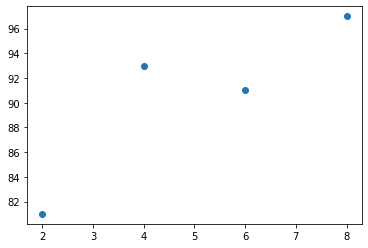

In [ ]:
# 데이터의 분포를 그래프로 나타냅니다.
plt.scatter(x, y)
plt.show()

### 4. 실행을 위한 변수 설정

In [ ]:
# 기울기 a와 y 절편 b의 값을 초기화합니다.
a = 0
b = 0

# 학습률을 정합니다.
lr = 0.03

# 몇 번 반복될지 설정합니다. 
epochs = 2001 

### 5. 경사 하강법

In [ ]:
# x 값이 총 몇 개인지 셉니다.
n=len(x)

# 경사 하강법을 시작합니다.
for i in range(epochs):                  # 에포크 수 만큼 반복
    
    y_pred = a * x + b                   # 예측 값을 구하는 식입니다. 
    error = y - y_pred                   # 실제 값과 비교한 오차를 error로 놓습니다.
    
    a_diff = (2/n) * sum(-x * (error))   # 오차 함수를 a로 편미분한 값입니다. 
    b_diff = (2/n) * sum(-(error))       # 오차 함수를 b로 편미분한 값입니다. 
    
    a = a - lr * a_diff     # 학습률을 곱해 기존의 a 값을 업데이트합니다.
    b = b - lr * b_diff     # 학습률을 곱해 기존의 b 값을 업데이트합니다.
    
    if i % 100 == 0:        # 100번 반복될 때마다 현재의 a 값, b 값을 출력합니다.
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))        

epoch=0, 기울기=27.8400, 절편=5.4300
epoch=100, 기울기=7.0739, 절편=50.5117
epoch=200, 기울기=4.0960, 절편=68.2822
epoch=300, 기울기=2.9757, 절편=74.9678
epoch=400, 기울기=2.5542, 절편=77.4830
epoch=500, 기울기=2.3956, 절편=78.4293
epoch=600, 기울기=2.3360, 절편=78.7853
epoch=700, 기울기=2.3135, 절편=78.9192
epoch=800, 기울기=2.3051, 절편=78.9696
epoch=900, 기울기=2.3019, 절편=78.9886
epoch=1000, 기울기=2.3007, 절편=78.9957
epoch=1100, 기울기=2.3003, 절편=78.9984
epoch=1200, 기울기=2.3001, 절편=78.9994
epoch=1300, 기울기=2.3000, 절편=78.9998
epoch=1400, 기울기=2.3000, 절편=78.9999
epoch=1500, 기울기=2.3000, 절편=79.0000
epoch=1600, 기울기=2.3000, 절편=79.0000
epoch=1700, 기울기=2.3000, 절편=79.0000
epoch=1800, 기울기=2.3000, 절편=79.0000
epoch=1900, 기울기=2.3000, 절편=79.0000
epoch=2000, 기울기=2.3000, 절편=79.0000


 기울기 $a$의 값이 2.3에 수렵하는 것과 $y$절편 $b$가 79에 수렴하는 과정을 봤습니다. 최적의 기울기($a$)가 2.3이고 최적의 $y$절편 $b$가 79라는 것은 최소 제곱법을 이용해서 알고 있었습니다. 여기서는 최소 제곱법을 사용하지 않고 '평균제곱오차'와 '경사 하강법'을 이용해서 원하는 값을 구할 수 있다는 것을 확인했습니다. 이와 똑같은 방법을 $x$가 여러 개인 다중 선형 회귀에서도 사용할 수 있습니다. 

### 6. 그래프 확인 

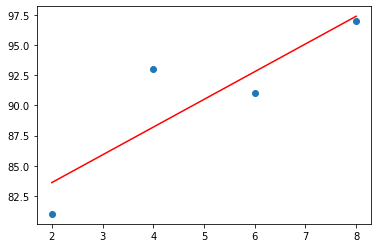

In [ ]:
# 앞서 구한 최종 a 값을 기울기, b 값을 y 절편에 대입하여 그래프를 그립니다.
y_pred = a * x + b      

# 그래프 출력
plt.scatter(x, y)
plt.plot(x, y_pred,'r')
plt.show()

***

[과제]   
변수가 늘었고 기호가 복잡해졌지만 기존에 해봤던 계산을 요구할 것입니다. 다음 식(1)을 $a_1$에 대해 편미분 하시오.  
(식1)  
$$MSE(e) = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2$$  
여기서 $\hat{y_i}$는 식(2)에 주여졌습니다.  
(식2)  
$$\hat{y_i} = a_1x_{1,i} + a_2x_{2,i} + b$$


[풀이]  
식(1)과 식(2)에서, $n$은 데이터의 개수이며 $y_i$는 각각의 실제 데이터이고 $\hat{y_i}$는 각각의 예측 데이터이다.   
(식3)  
$$e = \frac{1}{n} \sum(y_i-\hat{y_i})(y_i-\hat{y_i}) =\frac{1}{n} \sum({y_i}^2 - 2y_i\hat{y_i} + \hat{y_i}^2)$$  

식(3)에 식(2)를 대입하여 정리하면 식(4)와 같습니다.  
(식4)  
$$e=\frac{1}{n}\sum({y_i}^2 - 2 {y_i} ({a_1}{x_{1,i}} + {a_2} {x_{2,i}} + b) + ({a_1}{x_{1,i}} + {a_2} {x_{2,i}} + b)^2)$$

식(5)와 같이 정의하면 식(6)과 같은 표현이 가능하다.  

(식5)  
$$ A=({a_1}x_{1,i} + {a_2}x_{2,i})$$

(식6)
$$ ({a_1}{x_{1,i}} + {a_2} {x_{2,i}} + b)^2 = (A +b)^2$$

식(6)을 풀어서 쓰면 식(7)과 같다. 식(7)에 식(5)를 대입해서 풀면 식(8)과 같다.  
(식7) 
$$(A+b)^2 = A^2 + 2Ab + b^2$$
(식8)  
$$(A+b)^2 = ({a_1}x_{1,i} + {a_2}x_{2,i})({a_1}x_{1,i} + {a_2}x_{2,i})+ 2({a_1}x_{1,i} + {a_2}x_{2,i})b + b^2 $$  
식(8)을 다시 고쳐 쓰면 식(9)와 같다.  
(식9)
$$(A+b)^2= {a_1}^2 x_{1,i}^2 + 2{a_1}{a_2} {x_{1,i}x_{2,i}}+{a_2}^2 x_{2,i}^2 
+2 {a_1} b x_{1,i} +2{a_2} b x_{2,i} 
+b^2$$  

식(5)와 식(9)를 이용하여 식(3)을 고쳐쓰면 식(10)과 같다.  
(식10)
$$ e = \frac{1}{n}\sum(B)$$  
여기서  
(식11)  
$$B = {y_i}^2 - 2 {y_i} ({a_1}{x_{1,i}} + {a_2} {x_{2,i}} + b) + {a_1}^2 x_{1,i}^2 + 2{a_1}{a_2} {x_{1,i}x_{2,i}}+{a_2}^2 x_{2,i}^2 
+2 {a_1} b x_{1,i} +2{a_2} b x_{2,i} 
+b^2$$

식(11)을 다시 정리하면  (식12)와 같습니다.  
(식12)  
$$B = {y_i}^2 - 2{a_1}x_{1,i}y_i +2{a_2} x_{2,i}y_i + 2b{y_i}+{a_1}^2 x_{1,i}^2 + 2a_1{a_2}x_{1,i}x_{2,i} + {a_2}^2 x_{2,i}^2+2{a_1}bx_{1,i}+ 2{a_2} b x_{2,i} +b^2$$

식(12)를 식(10)에 넣어서 표현하면 식(13)과 같다.  
(식13)
$$ e = \frac{1}{n}\sum({y_i}^2 - 2{a_1}x_{1,i}y_i +2{a_2} x_{2,i}y_i + 2b{y_i}+{a_1}^2 x_{1,i}^2 + 2a_1{a_2}x_{1,i}x_{2,i} + {a_2}^2 x_{2,i}^2+2{a_1}bx_{1,i}+ 2{a_2} b x_{2,i} +b^2)$$


질문은 식(13)을 $a_1$에 대해 편미분 하라는 것과 같다. 식(13)을 $a_1$에 대해 미분하면 식(14)을 얻게 된다. 




















(식 14)  
$$ \frac{\partial{e}}{\partial{a_1}} = \frac{1}{n} \sum( -2x_{1,i}{y_i}+2{a_1} x_{1,i}^2 + 2{a_2} {x_{1,i}} {x_{2,i}} + 2b{x_{1,i}}) \\
= \frac{1}{n}\sum(-2x_{1,i}(y_i -{a_1}x_{1,i} -{a_2} x_{2,i}-b)) \\
= \frac{2}{n}\sum(-x_{1,i}(y_i - ({a_1}x_{1,i} +{a_2} x_{2,i}+b)))\\
= \frac{2}{n}\sum(-x_{1,i}(y_i - \hat{y_i}))$$  

**우리가 유도한 식(14)은 어떤 의미가 있는 것인가?**

## 3. 다중 선형 회귀의 개요


## 4. 파이썬 코딩으로 확인하는 다중 선형 회귀
 앞서 학생들이 공부한 시간에 따른 예측 선을 그리려고 기울기 $a$와 $y$ 절편 $b$를 구했습니다. 그런데 예측한 성적과 실제 학생들이 취득한 성적 사이에는 차이가 있습니다. 4시간 공부한 한색의 경우 88점을 예측했으나 실제 받은 점수는 93점을 받았고 6시간 공부한 학생은 93점을 받을 것으로 예측했으나 실제로는 91점을 받았습니다. 이러한 차이가 나는 이유는 공부한 시간 이외의 다른 요소가 성적에 영향을 주었다고 보는 것이 타당할 것입니다. 

 더 정확한 예측을 하려면 추가 정보를 고려해야하며 공부한 시간 외의 정보를 추가해서 새로운 예측값을 구해봐야할 것 입니다. 공부한 시간($x$)만 고려했던 기존 접근과 달리 '과외 수업 횟수'를 고려해보려고 합니다. 따라서 공부한 시간을 $x_1$이라고 하고 과외 수업 횟수'를 $x_2$라고 표기하겠습니다. 이 두 정보와 취득 점수를 아래 표로 정리했습니다.  

|취득 성적($y$)|81|93|91|97|
|---|---|---|---|---|
|공부한 시간($x_1$)|2|4|6|8|
|과외 수업 횟수($x_2$)|0|4|2|3|

 고려해야할 독립변수는 $x_1$과 $x_2$ 두 개이므로 취득 성적을 나타내는 종속 변수 $y$는 식(1)과 같이 나타낼 수 있습니다.   
(식1)
$$y = a_1x_1 + a_2x_2 + b $$  

그러면 $a_1$과 $a_2$를 어떻게 구할 수 있을까요? 앞서 배운 경사하강법을 그대로 적용하면 됩니다. 

 먼저 성적에 영향을 주는 두가지 정보,$x_1$과 $x_2$에 따른 성적($y$)을 그래프로 나타내보겠습니다. 이 그래프는 앞서 $x$와 $y$ 두 축이었던 것과 다리 $x_1$, $x_2$ 그리고 $y$ 이렇게 세 개의 축이 필요합니다. 



In [ ]:
x1 = np.array([2, 4, 6, 8])
x2 = np.array([0, 4, 2, 3])
y = np.array([91, 93, 91, 97])

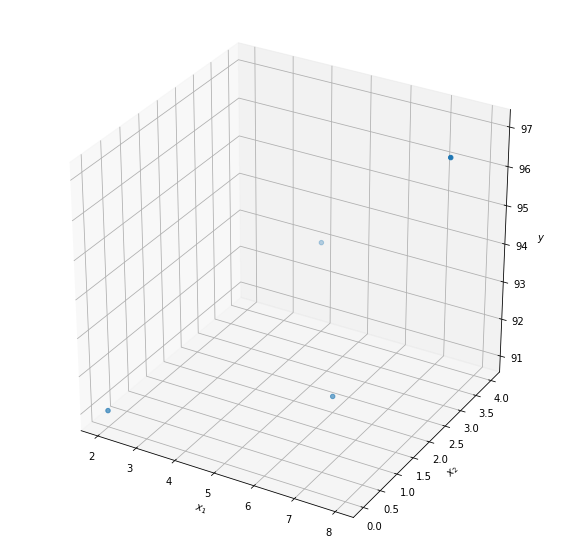

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter(x1, x2, y)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
plt.show()

코드의 형태는 크게 다르지 않습니다. 다만 고려할 사항이 2개로 늘어서 $x_1$, $x_2$ 두 개로 늘었고 따라서 기울기도 $a_1$과 $a_2$로 늘었습니다. 앞서 수행했던 방법대로 경사하강법을 적용해 보겠습니다.
$$\hat{y} = a_1 x_1 + a_2 x_2 + b$$

In [ ]:
x1 = np.array([2, 4, 6, 8])
x2 = np.array([0, 4, 2, 3])
y = np.array([91, 93, 91, 97])

# 임의로 a1, a2 그리고 b 값을 결정
a1 = 2
a2 = 2
b = 78

y_hat = a1 * x1 + a2*x2 + b      # 기울기와 절편 자리에 a1, a2, b를 각각 배치.
error = y - y_hat               # 에러, 즉 실제 값 - 예측 값

오차 함수를 $a_1, a_2, b$로 각각 편미분한 값을 a1_diff, a2_diff, b_diff라고 할 때 이를 구하는 코드는 아래와 같다고 받아들이겠습니다. 

In [ ]:
n = len(x1)     # n은 데이터 개수, 이전 예제에서는 변수 이름으로 N을 사용하기도 했음.
a1_diff = (2/n) * sum(-x1*error)      # 오차 함수를 a1로 편미분한 값입니다.
a2_diff = (2/n) * sum(-x2*error)      # 오차 함수를 a2로 편미분한 값입니다.
b_diff = (2/n) * sum(-error)          # 오차 함수를 b로 편미분한 값입니다.

학습률을 곱해 기존의 기울기와 절편을 업데이트한 값을 구합니다.

In [ ]:
lr = 0.003

In [ ]:
a1 = a1 - lr * a1_diff
a2 = a2 - lr * a2_diff
b = b - lr * b_diff

y_hat = a1 * x1 + a*x2 + b 
print(y-y_hat)

[ 9.081      -2.03500016 -3.35100008 -3.56700012]


위 코드 셀을 정리하면

In [ ]:
x1 = np.array([2, 4, 6, 8])
x2 = np.array([0, 4, 2, 3])
y = np.array([91, 93, 91, 97])

# 임의로 a1, a2 그리고 b 값을 결정
a1 = 2
a2 = 2
b = 78

n = len(x1)     # n은 데이터 개수, 이전 예제에서는 변수 이름으로 N을 사용하기도 했음.
lr = 0.03

for i in range(1700):
  y_hat = a1 * x1 + a2 * x2 + b       # 예측 식을 생성
  error = y - y_hat                   # 에러, 즉 실제 값 - 예측 값
 
  a1_diff = (2/n) * sum(-x1*error)    # a1_diff는 오차 함수를 a1로 편미분한 값입니다.
  a2_diff = (2/n) * sum(-x2*error)    # a2_diff는 오차 함수를 a2로 편미분한 값입니다.
  b_diff = (2/n) * sum(-error)        # b_diff는 오차 함수를 b로 편미분한 값입니다.

  a1 = a1 - lr * a1_diff              # 오차 함수의 a1에 대한 기울기가 0이 되는 지검을 찾기 위해 새로운 a1 값 생성
  a2 = a2 - lr * a2_diff              # 오차 함수의 a2에 대한 기울기가 0이 되는 지검을 찾기 위해 새로운 a2 값 생성
  b = b - lr * b_diff                 # 오차 함수의 b에 대한 기울기가 0이 되는 지검을 찾기 위해 새로운 b 값 생성
 
print(y-y_hat)

[7.43350097e+136 2.05103771e+137 2.42559674e+137 3.26672005e+137]


### 1.환경 준비

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### 2. 데이터 준비

In [ ]:
# 공부 시간 x1과 과외 시간 x2, 그 성적 y의 넘파이 배열을 만듭니다. 
x1 = np.array([2, 4, 6, 8])
x2 = np.array([0, 4, 2, 3])
y = np.array([81, 93, 91, 97]) 

### 3. 데이터 분포 확인

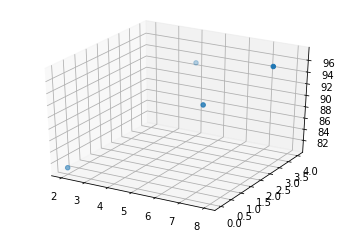

In [ ]:
# 데이터의 분포를 그래프로 나타냅니다.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x1, x2, y)
plt.show()

### 4. 실행을 위한 변수 설정

In [ ]:
# 기울기 a와 절편 b의 값을 초기화합니다.
a1 = 0
a2 = 0
b = 0

# 학습률을 정합니다.
lr = 0.01 

# 몇 번 반복될지 설정합니다.
epochs = 2001 

### 5. 경사 하강법

In [ ]:
# x 값이 총 몇 개인지 셉니다. x1과 x2의 수가 같으므로 x1만 세겠습니다. 
n=len(x1)

# 경사 하강법을 시작합니다.
for i in range(epochs):                  # 에포크 수 만큼 반복
    
    y_pred = a1 * x1 + a2 * x2 + b       # 예측 값을 구하는 식을 세웁니다
    error = y - y_pred                   # 실제 값과 비교한 오차를 error로 놓습니다.
    
    a1_diff = (2/n) * sum(-x1 * (error)) # 오차 함수를 a1로 편미분한 값입니다. 
    a2_diff = (2/n) * sum(-x2 * (error)) # 오차 함수를 a2로 편미분한 값입니다. 
    b_diff = (2/n) * sum(-(error))       # 오차 함수를 b로 편미분한 값입니다. 
    
    a1 = a1 - lr * a1_diff  # 학습률을 곱해 기존의 a1 값을 업데이트합니다.
    a2 = a2 - lr * a2_diff  # 학습률을 곱해 기존의 a2 값을 업데이트합니다.
    b = b - lr * b_diff     # 학습률을 곱해 기존의 b 값을 업데이트합니다.
    
    if i % 100 == 0:        # 100번 반복될 때마다 현재의 a1, a2, b 값을 출력합니다.
        print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f" % (i, a1, a2, b))        

epoch=0, 기울기1=9.2800, 기울기2=4.2250, 절편=1.8100
epoch=100, 기울기1=9.5110, 기울기2=5.0270, 절편=22.9205
epoch=200, 기울기1=7.3238, 기울기2=4.2950, 절편=37.8751
epoch=300, 기울기1=5.7381, 기울기2=3.7489, 절편=48.7589
epoch=400, 기울기1=4.5844, 기울기2=3.3507, 절편=56.6800
epoch=500, 기울기1=3.7447, 기울기2=3.0608, 절편=62.4448
epoch=600, 기울기1=3.1337, 기울기2=2.8498, 절편=66.6404
epoch=700, 기울기1=2.6890, 기울기2=2.6962, 절편=69.6938
epoch=800, 기울기1=2.3653, 기울기2=2.5845, 절편=71.9160
epoch=900, 기울기1=2.1297, 기울기2=2.5032, 절편=73.5333
epoch=1000, 기울기1=1.9583, 기울기2=2.4440, 절편=74.7103
epoch=1100, 기울기1=1.8336, 기울기2=2.4009, 절편=75.5670
epoch=1200, 기울기1=1.7428, 기울기2=2.3695, 절편=76.1904
epoch=1300, 기울기1=1.6767, 기울기2=2.3467, 절편=76.6441
epoch=1400, 기울기1=1.6286, 기울기2=2.3301, 절편=76.9743
epoch=1500, 기울기1=1.5936, 기울기2=2.3180, 절편=77.2146
epoch=1600, 기울기1=1.5681, 기울기2=2.3092, 절편=77.3895
epoch=1700, 기울기1=1.5496, 기울기2=2.3028, 절편=77.5168
epoch=1800, 기울기1=1.5361, 기울기2=2.2982, 절편=77.6095
epoch=1900, 기울기1=1.5263, 기울기2=2.2948, 절편=77.6769
epoch=2000, 기울기1=1.5191, 기울기2=2.2

In [ ]:
# 실제 점수와 예측된 점수를 출력합니다.
print("실제 점수:", y)
print("예측 점수:", y_pred)

실제 점수: [81 93 91 97]
예측 점수: [80.76387645 92.97153922 91.42520875 96.7558749 ]


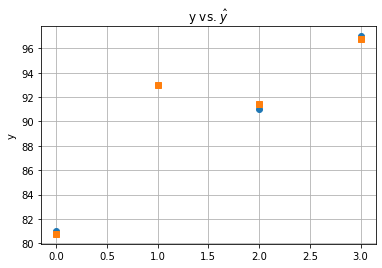

In [ ]:
plt.plot(y, 'o')
plt.plot(y_pred, 's')
plt.title('y vs. $\hat{y}$')
plt.ylabel('y')
plt.grid()


## 5-1. 텐서플로에서 실행하는 선형 회귀 모델

 우리는 머신 러닝의 기본인 선형회귀에 대해 배우고 있습니다. 그런데 우리 목표는 딥러닝이지요. 2장에서 잠시 살펴보았지만, 앞으로 우리는 딥러닝을 실행하기 위해 텐서플로라는 라이브러리의 케라스 API를 불러와 사용할 것입니다. 따라서 지금까지 배운 선형 회귀의 개념과 팁러닝 라이브러리들이 어떻게 연결되는지 살펴볼 필요가 있습니다. 이를 통해 텐서플로우 및 케라스의 사용법을 익히는 것은 물론이고 딥러닝 자체에 대한 학습도 한걸음 더 나가게 될 것입니다. 
 선형 회귀는 현상을 분석하는 방법의 하나입니다. 머신 러닝은 이러한 분석 방법을 이용해 예측 모델을 만든는 것이지요. 따라서 두 분야에서 사용하는 용어가 약간 다릅니다. 예를 들어 함수 $y=ax+b$라는 공부한 시간과 성적의 관계를 유추하기 위해 필요했던 식이었습니다. 문제를 해결하기 위해 가정한 식을 머신 러닝에서는 **가설 함수(hypothesis)**하며 **$H(x)$**라고 표기합니다. 또 기울기 $a$는 변수 $x$에 어느 정도 가중치를 두는지 결정하므로 **가중치(weight)**라고 하며 $w$로 표시합니다. 절편 $b$는 데이터의 특성에 따라 따로 부여되는 값이므로 **편향(bias)**이라고 하며 $b$로 표시합니다. 따라서 우리가 앞서 사용한 $y=ax+b$를 머신 러닝에서는 식(1)과 같이 표기합니다.  
(식1)
$$ y = ax + b → H(x)=wx+b$$  

또한 평균 제곡 오차처럼 실제 값과 예측한 값 사이의 오차를 나타내는 식을 **손실 함수(loss function)**이라고 합니다. 

$$평균 제곱 오차 → 손실 함수(loss function)$$

최적의 기울기와 절편을 찾기 위해 앞서 경사 하강법을 배웠지요? 딥러닝에서는 이를 **옵티마이저(optimizer)**라고 합니다. 앞서 사용한 경사 하강법은 딥러닝에서 사용되는 여러 옵티마이저 중 하나였습니다. 경사 하강법 외에 옵티마이저에 대해서는 9장에서 상세히 배웁니다. 




이제부터는 손실 함수, 옵티마이저라는 용어를 사용해서 설명하겠습니다. 먼저 텐스플로에 포함된 케라스 API 중 필요한 함수들을 다음과 같이 불러 옵니다.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
x = np.array([2,4,6,8])
y = np.array([81,93,91, 97])

Sequential() 함수와 Dense() 함수는 2장에서 이미 소개한 바 있습니다. 이 함수를 불러와 선형 회귀를 실행하는 코드는 다음과 같습니다.


In [ ]:
# 이 코드 cell 실행 시 주석 처리된 아래 코드를 주석 해제하여 실행 시킬 것. 
# 이 코드 cell를 실행 키시면 다소 시간이 걸림.
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))       # 1
model.compile(optimizer='sgd', loss='mse')                  # 2
model.fit(x, y, epochs=2000)                                # 3

Epoch 1/2000
1/1 [==============================] - 0s 250ms/step - loss: 7015.9023
Epoch 2/2000
1/1 [==============================] - 0s 11ms/step - loss: 1867.5619
Epoch 3/2000
1/1 [==============================] - 0s 10ms/step - loss: 1106.0248
Epoch 4/2000
1/1 [==============================] - 0s 8ms/step - loss: 988.8344
Epoch 5/2000
1/1 [==============================] - 0s 7ms/step - loss: 966.3170
Epoch 6/2000
1/1 [==============================] - 0s 6ms/step - loss: 957.7392
Epoch 7/2000
1/1 [==============================] - 0s 7ms/step - loss: 951.2428
Epoch 8/2000
1/1 [==============================] - 0s 7ms/step - loss: 945.0858
Epoch 9/2000
1/1 [==============================] - 0s 7ms/step - loss: 939.0127
Epoch 10/2000
1/1 [==============================] - 0s 7ms/step - loss: 932.9852
Epoch 11/2000
1/1 [==============================] - 0s 7ms/step - loss: 926.9977
Epoch 12/2000
1/1 [==============================] - 0s 7ms/step - loss: 921.0490
Epoch 13/2000
1/1 

 위 코드 cell에서 주석 1, 2, 3의 세 줄의 코드에 앞서 공부한 모든 것이 담겨져 있습니다. 어떻게 설정하는지 살펴보겠습니다. 주석 1번에서, 가설 함수는 $H(x)=wx+b$입니다. 이때 출력되는 값(성적)이 하나씩이므로 Dense() 함수의 첫 번째 인자에 1이라고 설정합니다. 입력될 변수(공부 시간)도 하나뿐이므로 input_dim 역시 1이라고 설정합니다. 입력된 값을 다음 층으로 넘길 때 각 값을 어떻게 처리할지를 결정하는 함수를 활성화 함수라고 합니다. activation은 활성화 함수를 정의하는 옵션입니다. 우리는 지금 선형 회귀를 고려하고 있으므로 'linear'라고 적어주면 됩니다. 딥러닝 목적에 따라 다른 활성화 함수를 넣을 수도 있는데, 예를 들어 다음 절에서 배울 시그모이드(sigmoid) 함수가 사용할 것이라면 activation 옵션에 'sigmoid'를 할당하면 됩니다. 딥러닝에서 사용하는 여러 가지 활성화 함수에 대해서는 9장에서 상세히 배웁니다. 주석 2번에서, 앞서 배운 경사 하강법을 실행하려면 옵티마이저에 sgd라고 설정합니다. 손실 함수는 평균 제곱 오차를 사용할 것이기 때문에 mse라고 설정합니다. 주석 3번에서, 앞서 따로 코딩했던 epochs 숫자를 model.fit()함수에 전달합니다.  
 공부 시간($x$)이 입력되었을 때의 예측점수는 model.predict(x)로 알 수 있습니다. 예측 점수로 그래프를 그려보면 다음과 같습니다.



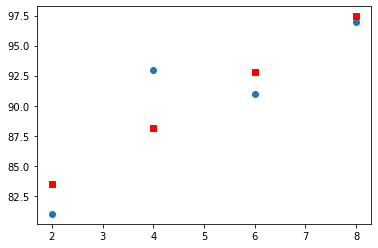

In [ ]:
plt.scatter(x,y)
plt.plot(x, model.predict(x), 'sr')
plt.show()

### 1. 환경 준비

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 텐서플로의 케라스 API에서 필요한 함수들을 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### 2. 데이터 준비

In [ ]:
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97]) 

### 3. 모델 실행

In [ ]:
model = Sequential()

# 출력 값, 입력 변수, 분석 방법에 맞게끔 모델을 설정합니다. 
model.add(Dense(1, input_dim=1, activation='linear'))

# 오차 수정을 위해 경사 하강법(sgd)을, 오차의 정도를 판단하기 위해 평균 제곱 오차(mse)를 사용합니다. 
model.compile(optimizer='sgd', loss='mse')

# 오차를 최소화하는 과정을 2000번 반복합니다.
model.fit(x, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 246ms/step - loss: 8472.4639
Epoch 2/2000
1/1 [==============================] - 0s 7ms/step - loss: 2075.7622
Epoch 3/2000
1/1 [==============================] - 0s 8ms/step - loss: 1130.9095
Epoch 4/2000
1/1 [==============================] - 0s 7ms/step - loss: 986.8315
Epoch 5/2000
1/1 [==============================] - 0s 8ms/step - loss: 960.4017
Epoch 6/2000
1/1 [==============================] - 0s 7ms/step - loss: 951.2853
Epoch 7/2000
1/1 [==============================] - 0s 7ms/step - loss: 944.7462
Epoch 8/2000
1/1 [==============================] - 0s 6ms/step - loss: 938.6190
Epoch 9/2000
1/1 [==============================] - 0s 6ms/step - loss: 932.5859
Epoch 10/2000
1/1 [==============================] - 0s 7ms/step - loss: 926.5997
Epoch 11/2000
1/1 [==============================] - 0s 7ms/step - loss: 920.6535
Epoch 12/2000
1/1 [==============================] - 0s 7ms/step - loss: 914.7460
Epoch 13/2000
1/1 [=

### 4. 그래프로 확인

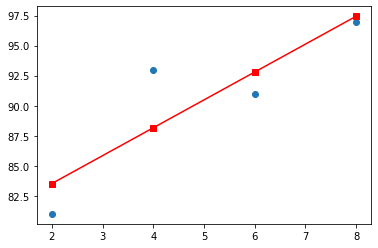

In [ ]:
plt.scatter(x, y)
plt.plot(x, model.predict(x),'sr-')    # 예측 결과를 그래프로 나타냅니다.
plt.show()

### 5. 모델 테스트

In [ ]:
# 임의의 시간을 집어넣어 점수를 예측하는 모델을 테스트해 보겠습니다.

hour = 7
prediction = model.predict([hour])

print("%.f시간을 공부할 경우의 예상 점수는 %.02f점입니다" % (hour, prediction))

7시간을 공부할 경우의 예상 점수는 95.12점입니다


## 5-2 텐서플로에서 실행하는 다중 선형 회귀 모델

### 1.환경 준비

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 텐서플로의 케라스 API에서 필요한 함수들을 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### 2. 데이터 준비

In [ ]:
x = np.array([[2, 0], [4, 4], [6, 2], [8, 3]])
y = np.array([81, 93, 91, 97]) 

### 3. 모델 실행

In [ ]:
model = Sequential()

# 입력 변수가 2개(학습 시간, 과외 시간)이므로 input_dim에 2를 입력합니다. 
model.add(Dense(1, input_dim=2, activation='linear'))     # 1
model.compile(optimizer='sgd' ,loss='mse')                # 2
model.fit(x, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 256ms/step - loss: 6913.0254
Epoch 2/2000
1/1 [==============================] - 0s 7ms/step - loss: 1350.7026
Epoch 3/2000
1/1 [==============================] - 0s 14ms/step - loss: 954.0269
Epoch 4/2000
1/1 [==============================] - 0s 16ms/step - loss: 920.6846
Epoch 5/2000
1/1 [==============================] - 0s 10ms/step - loss: 912.9299
Epoch 6/2000
1/1 [==============================] - 0s 8ms/step - loss: 907.0093
Epoch 7/2000
1/1 [==============================] - 0s 7ms/step - loss: 901.2521
Epoch 8/2000
1/1 [==============================] - 0s 6ms/step - loss: 895.5402
Epoch 9/2000
1/1 [==============================] - 0s 6ms/step - loss: 889.8651
Epoch 10/2000
1/1 [==============================] - 0s 6ms/step - loss: 884.2262
Epoch 11/2000
1/1 [==============================] - 0s 6ms/step - loss: 878.6230
Epoch 12/2000
1/1 [==============================] - 0s 6ms/step - loss: 873.0557
Epoch 13/2000
1/1 

주석 1번에서, 가설 함수는  H(x)=wx+b 입니다. 이때 출력되는 값(성적)이 하나씩이므로 Dense() 함수의 첫 번째 인자에 1이라고 설정합니다. 입력될 변수(공부 시간, 과외 학습 시간)가 두 개이므로 input_dim에 2을 할당합니다. 입력된 값을 다음 층으로 넘길 때 각 값을 어떻게 처리할지를 결정하는 함수를 활성화 함수라고 합니다. activation은 활성화 함수를 정의하는 옵션입니다. 우리는 지금 선형 회귀를 고려하고 있으므로 'linear'라고 적어주면 됩니다. 주석 2번에서, 앞서 배운 경사 하강법을 실행하려면 옵티마이저에 sgd라고 설정합니다. 손실 함수는 평균 제곱 오차를 사용할 것이기 때문에 mse라고 설정합니다. 주석 3번에서, 앞서 따로 코딩했던 epochs 숫자를 model.fit()함수에 전달합니다.

### 4. 모델 테스트

In [ ]:
# 임의의 학습 시간과 과외 시간을 집어넣어 점수를 예측하는 모델을 테스트해 보겠습니다.

hour = 7
private_class = 4
prediction = model.predict([[hour, private_class]])

print("%.f시간을 공부하고 %.f시간의 과외를 받을 경우, 예상 점수는 %.02f점입니다" % (hour, private_class, prediction))

7시간을 공부하고 4시간의 과외를 받을 경우, 예상 점수는 97.53점입니다
